## Case study: How Does a Bike-Share Navigate Speedy Success?

**Snehil S P**

**2023-02-08**

## Introduction

The capstone assignment for the Google Data Analytics Professional Certificate is an exploratory research case study. The case study uses information from a bikeshare company about the trips of its users across a year (Jan 2022 - Jan 2023). Motivate International Inc. has made the data accessible through this [licence](https://ride.divvybikes.com/data-license-agreement).

The six steps of the data analysis process will be followed: Ask, Prepare, Process, Analyze, Share and Act.

**Ask:**

* Ask effective questions
* Define the scope of the analysis
* Define what success looks like

**Prepare:**

* Verify data’s integrity
* Check data credibility and reliability
* Check data types
* Merge datasets

**Process:**

* Clean, Remove and Transform data
* Document cleaning processes and results

**Analyze:**

* Identify patterns
* Draw conclusions
* Make predictions

**Share:**

* Create effective visuals
* Create a story for data
* Share insights to stakeholders

**Act:**

* Give recommendations based on insights
* Solve problems
* Create something new


## 1. Ask


**Scenario:**

The marketing team must develop marketing plans to turn occasional riders into yearly subscribers. However, the marketing analyst team must first have a deeper understanding of the distinctions between annual members and casual riders.

**Stakeholders:**

* Lily Moreno: The director of marketing and my manager.
* Cyclistic executive team: A detail-oriented executive team who will decide whether to approve the recommended marketing program.
* Cyclistic marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Cyclistic’s marketing strategy.

**Objective:**

Therefore, the goal of this analysis is to shed some insight on how the two types of customers—annual members and casual riders—use Cyclistic bikeshare differently, depending on a few criteria that may be estimated or retrieved from current data.

**Deliverables:**

* Understanding the differences between how annual members and casual riders use bicycles
* To complement findings, offer compelling images and pertinent data.
* Utilize knowledge to offer three suggestions to turn casual riders into members.


## 2. Prepare


**Data Sources:**

Starting in January 2022 and continuing through January 2023, a total of 12 datasets have been made accessible for each month. Every ride that Cyclistic customers log is detailed in each dataset. The personal information of the riders has been removed from this publically available data.


**Documentation, Cleaning and Preparation of data for analysis:**

All **12 datasets** from **January 2022 to January 2023** are together are around 1 GB in size. When compared to SQL or R, data cleansing in spreadsheets will be sluggish and time-consuming. I chose R purely because I could combine data manipulation with analysis and visualisation on the same platform. Additionally, it gives me the chance to enhance my R knowledge.


**Loading the Libraries:**

In [1]:
# Preparing the data.

# Load all the necessary libraries.

library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(readr)
library(janitor)
library(data.table)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    tran

**Loading the Datasets:**

In [4]:
# Import the csv files.

tripdata1_202201 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202201-divvy-tripdata1.csv")
tripdata2_202202 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202202-divvy-tripdata2.csv")
tripdata3_202203 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202203-divvy-tripdata3.csv")
tripdata4_202204 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202204-divvy-tripdata4.csv")
tripdata5_202205 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202205-divvy-tripdata5.csv")
tripdata6_202206 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202206-divvy-tripdata6.csv")
tripdata7_202207 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202207-divvy-tripdata7.csv")
tripdata8_202208 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202208-divvy-tripdata8.csv")
tripdata9_202209 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202209-divvy-tripdata9.csv")
tripdata10_202210 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202210-divvy-tripdata10.csv")
tripdata11_202211 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202211-divvy-tripdata11.csv")
tripdata12_202212 <- read.csv("/kaggle/input/bikeshare-data-22/csv_ds/202212-divvy-tripdata12.csv")

**Check column names of each data set for consistency:**

In [5]:
# Preview and check column names of each data set for consistency.

colnames(tripdata1_202201)
colnames(tripdata2_202202)
colnames(tripdata3_202203)
colnames(tripdata4_202204)
colnames(tripdata5_202205)
colnames(tripdata6_202206)
colnames(tripdata7_202207)
colnames(tripdata8_202208)
colnames(tripdata9_202209)
colnames(tripdata10_202210)
colnames(tripdata11_202211)
colnames(tripdata12_202212)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

**Check data structures and data types for all data frames:**

In [6]:
# Preview and check the structure of the data.

str(tripdata1_202201)
str(tripdata2_202202)
str(tripdata3_202203)
str(tripdata4_202204)
str(tripdata5_202205)
str(tripdata6_202206)
str(tripdata7_202207)
str(tripdata8_202208)
str(tripdata9_202209)
str(tripdata10_202210)
str(tripdata11_202211)
str(tripdata12_202212)

'data.frame':	103770 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num

## 3. Process


**Data transformation and cleaning:**

All datasets do not consistently use start_station_id and end_station_id. All 12 datasets have 2 columns that are a combination of characters and integers. Transform all the erratic data from various formats to the char datatype.

In [8]:
# Processing the data.

# Cleaning and transforming the data.

tripdata1_202201 <- tripdata1_202201 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata2_202202 <- tripdata2_202202 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata3_202203 <- tripdata3_202203 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata4_202204 <- tripdata4_202204 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata5_202205 <- tripdata5_202205 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata6_202206 <- tripdata6_202206 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata7_202207 <- tripdata7_202207 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata8_202208 <- tripdata8_202208 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata9_202209 <- tripdata9_202209 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata10_202210 <- tripdata10_202210 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata11_202211 <- tripdata11_202211 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata12_202012 <- tripdata12_202212 %>% mutate(start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))



**Combine all the data sets into one single data frame:**

In [9]:
# Converge on a single data frame from all data sets.

all_trips <- bind_rows(tripdata1_202201,tripdata2_202202,tripdata3_202203,tripdata4_202204,tripdata5_202205,tripdata6_202206,tripdata7_202207,tripdata8_202208,tripdata9_202209,tripdata10_202210,tripdata11_202211,tripdata12_202212)
str(all_trips)

'data.frame':	5667717 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : nu

**Cleaning the data further:**

The fields started_at and ended_at ought to be of the datetime datatype rather than
of the char kind. Make a datetimeformat conversion for all characters.

In [10]:
# Convert date&time from character to date&time format.
all_trips <- all_trips %>% mutate(started_at = as.POSIXct(started_at), ended_at = as.POSIXct(ended_at))
glimpse(all_trips)
str(all_trips)

Rows: 5,667,717
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:56, 2022-01-…
$ ended_at           <dttm> 2022-01-13 12:02:44, 2022-01-10 08:46:17, 2022-01-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_cas

**Remove columns not required or beyond the scope of project:**

In [11]:
# Removing columns not required or beyond the scope of project.

all_trips <- all_trips %>%
  select(-c(start_lat:end_lng))
glimpse(all_trips)


# Changing column names to improve readability.

all_trips <- all_trips %>%
  rename(ride_type = rideable_type, 
         start_time = started_at,
         end_time = ended_at,
         customer_type = member_casual)
glimpse(all_trips)

Rows: 5,667,717
Columns: 9
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:56, 2022-01-…
$ ended_at           <dttm> 2022-01-13 12:02:44, 2022-01-10 08:46:17, 2022-01-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ member_casual      <chr> "casual", "casual", "member", "casual", "member", "…
Rows: 5,667,717
Columns: 9
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ ride_type          <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ start_time         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:

**Add new columns that can be used for aggregate functions:**

In [12]:
# Column for day of the week the trip started.
all_trips$day_of_the_week <- format(as.Date(all_trips$start_time),'%a')

# Column for month when the trip started.
all_trips$month <- format(as.Date(all_trips$start_time),'%b_%y')

# Column for time of the day when the trip started.
# Time element needs to be extracted from start_time. However, as the times must be in POSIXct
# (Only times of class POSIXct are supported in ggplot2), a two-step conversion is needed. 
# First the time is converted to a character vector, effectively stripping all the date information. 
# The time is then converted back to POSIXct with today’s date – the date is of no interest to us,
# Only the hours-minutes-seconds are.
all_trips$time <- format(all_trips$start_time, format = "%H:%M")
all_trips$time <- as.POSIXct(all_trips$time, format = "%H:%M")

# Column for trip duration in min.
all_trips$trip_duration <- (as.double(difftime(all_trips$end_time, all_trips$start_time)))/60

# Check the data frame.
glimpse(all_trips)

Rows: 5,667,717
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ ride_type          <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ start_time         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:56, 2022-01-…
$ end_time           <dttm> 2022-01-13 12:02:44, 2022-01-10 08:46:17, 2022-01-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ customer_type      <chr> "casual", "casual", "member", "casual", "member", "…
$ day_of_the_week    <chr> "Thu", "Mon", "Tue", "Tue", "Thu", "Tue", "Sun", "S…
$ month              <chr> "Jan_22", "Jan_22", "Jan_22", "Jan_22", "Jan_22", "…
$ time               <dttm> 2023-05-29 11:59:00, 2023-05-29 08:41:00, 2023-05-…
$ trip_durat

To avoid issues while building visualisations, let's determine if the trip duration column contains any negative values. Additionally, we don't want to include the journeys that the firm used as part of quality checks. The term "test" in the start_station_name field is typically used to identify these journeys.

In [13]:
# Checking for trip lengths less than 0.
nrow(subset(all_trips,trip_duration < 0))

# Checking for test rides that were made by company for quality checks.
nrow(subset(all_trips, start_station_name %like% "TEST"))
nrow(subset(all_trips, start_station_name %like% "test"))
nrow(subset(all_trips, start_station_name %like% "Test"))

[1] 100

[1] 0

[1] 0

[1] 1

We will exclude these observations from our data frame since they make up less than 0.1% of the total rows and there are 100 rows with trip_duration less than 0 minutes and just one trip that was a test ride. Sans making any modifications to the current data frame, we will build a new data frame without these observations.

In [14]:
# Remove negative trip duration. 
all_trips_v2 <- all_trips[!(all_trips$trip_duration < 0),]


# Remove test rides.
all_trips_v2<- all_trips_v2[!((all_trips_v2$start_station_name %like% "TEST" | all_trips_v2$start_station_name %like% "test")),]


# Check data frame.
glimpse(all_trips_v2)

Rows: 5,667,617
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ ride_type          <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ start_time         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:56, 2022-01-…
$ end_time           <dttm> 2022-01-13 12:02:44, 2022-01-10 08:46:17, 2022-01-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ customer_type      <chr> "casual", "casual", "member", "casual", "member", "…
$ day_of_the_week    <chr> "Thu", "Mon", "Tue", "Tue", "Thu", "Tue", "Sun", "S…
$ month              <chr> "Jan_22", "Jan_22", "Jan_22", "Jan_22", "Jan_22", "…
$ time               <dttm> 2023-05-29 11:59:00, 2023-05-29 08:41:00, 2023-05-…
$ trip_durat

Make sure the customer_type column only has two different values. Verify that it is the same.

In [15]:
# Checking count of distinct values.
table(all_trips_v2$customer_type)
#aggregating total trip duration by customer type
setNames(aggregate(trip_duration ~ customer_type, all_trips_v2, sum), c("customer_type", "total_trip_duration(mins)"))


 casual  member 
2321977 3345640 

customer_type,total_trip_duration(mins)
<chr>,<dbl>
casual,67675695
member,42536503


## 4&5. Analyze and Share the Data

The data frame is now prepared for descriptive analysis, which will enable us to gain some understanding of the differences between how members and casual riders use Cyclistic ridesharing.

Let's start by attempting to get some basic data on trip_duration for all clients and by customer_type.

In [16]:
# Analyze and Share the Data.


# Statistical summary of trip_duration for all trips.
summary(all_trips_v2$trip_duration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.82    10.28    19.45    18.47 41387.25 

In [17]:
# Statistical summary of trip_duration by customer_type.
all_trips_v2 %>%
  group_by(customer_type) %>%
  summarise(min_trip_duration = min(trip_duration),max_trip_duration = max(trip_duration),
            median_trip_duration = median(trip_duration), mean_trip_duration = mean(trip_duration))

customer_type,min_trip_duration,max_trip_duration,median_trip_duration,mean_trip_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,0,41387.25,13.000000,29.14572
member,0,1559.90,8.833333,12.71401


The average travel time for members is less than the average trip time for all trips, whereas the average trip time for casual riders is precisely the opposite—it is longer than the average trip time for all journeys. This reveals that compared to members, casual riders typically ride their bikes for longer periods of time.

**Total number of trips by customer type and day of the week:**

In [18]:
# Total number of trips by customer type and day of the week.

# fix the order for the day_of_the_week and month variable so that they show up 
# in the same sequence in output tables and visualizations
all_trips_v2$day_of_the_week <- ordered(all_trips_v2$day_of_the_week, levels=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))
all_trips_v2$month <- ordered(all_trips_v2$month, levels=c("Jan_22", "Feb_22", "Mar_22", "Apr_22", "May_22", "Jun_22", "Jul_22",
                                                           "Aug_22", "Sep_22", "Oct_22","Nov_22", "Dec_22"))  


# Total number of trips by customer type and day of the week. 

all_trips_v2 %>% 
  group_by(customer_type, day_of_the_week) %>%  
  summarise(number_of_rides = n(),average_duration_mins = mean(trip_duration)) %>% 
  arrange(customer_type, desc(number_of_rides))

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


customer_type,day_of_the_week,number_of_rides,average_duration_mins
<chr>,<ord>,<int>,<dbl>
casual,Sat,473185,32.61408
casual,Sun,389011,34.05795
casual,Fri,334698,28.04425
casual,Thu,309327,25.54792
casual,Mon,277671,29.18736
casual,Wed,274354,24.75085
casual,Tue,263731,25.82287
member,Thu,532255,12.29273
member,Wed,523867,12.10489


**Visualization:**

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


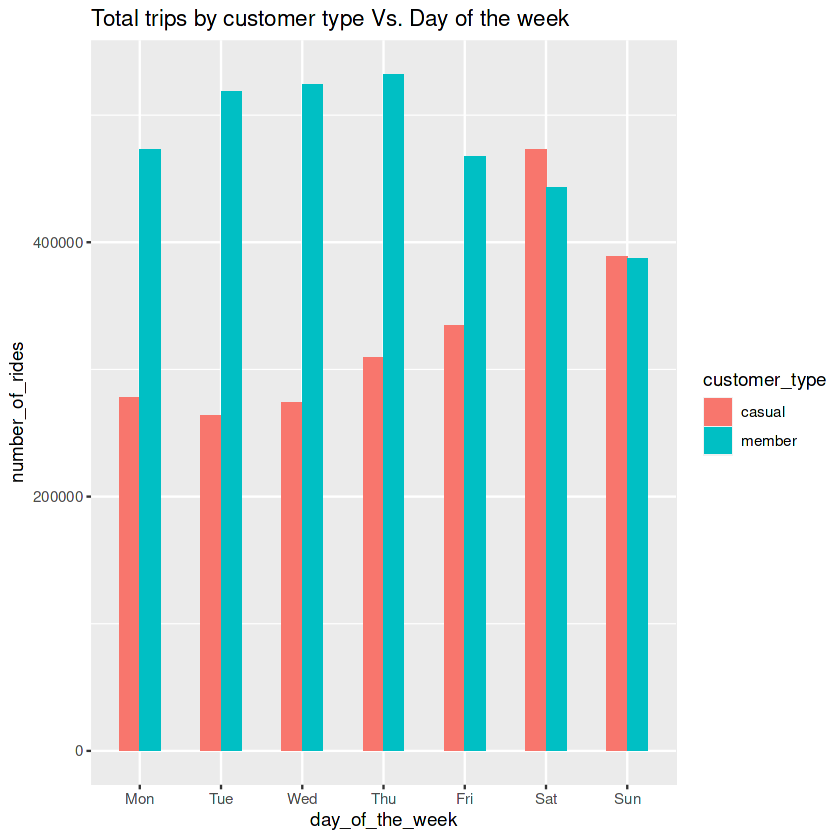

In [19]:
# Visualizing total number of trips by customer type and day of the week.

all_trips_v2 %>%  
  group_by(customer_type, day_of_the_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(customer_type, day_of_the_week)  %>% 
  ggplot(aes(x = day_of_the_week, y = number_of_rides, fill = customer_type)) +
  labs(title ="Total trips by customer type Vs. Day of the week") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

The table and graph above show that Saturdays and Sundays are the busiest days for casual consumers, whereas the second part of the week and the weekend are the busiest for members. A noteworthy tendency is that members consistently take more trips per week on average than casual riders, who don't appear to utilize the bike share programs very often on weekdays.

**Total number of trips by customer type and month:**


In [20]:
# Average number of trips by customer type and month.

unique(all_trips$month)
all_trips_v2 %>% 
  group_by(customer_type, month) %>%  
  summarise(number_of_rides = n(),`average_duration_(mins)` = mean(trip_duration)) %>% 
  arrange(customer_type,desc(number_of_rides))

[1] "Jan_22" "Feb_22" "Mar_22" "Apr_22" "May_22" "Jun_22" "Jul_22" "Aug_22"
 [9] "Sep_22" "Oct_22" "Nov_22" "Dec_22"

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


customer_type,month,number_of_rides,average_duration_(mins)
<chr>,<ord>,<int>,<dbl>
casual,Jul_22,406046,29.27885
casual,Jun_22,369044,32.09961
casual,Aug_22,358917,29.31065
casual,Sep_22,296694,27.98546
casual,May_22,280414,30.86972
casual,Oct_22,208988,26.38755
casual,Apr_22,126417,29.53243
casual,Nov_22,100747,21.30045
casual,Mar_22,89880,32.62318


**Visualization:**

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


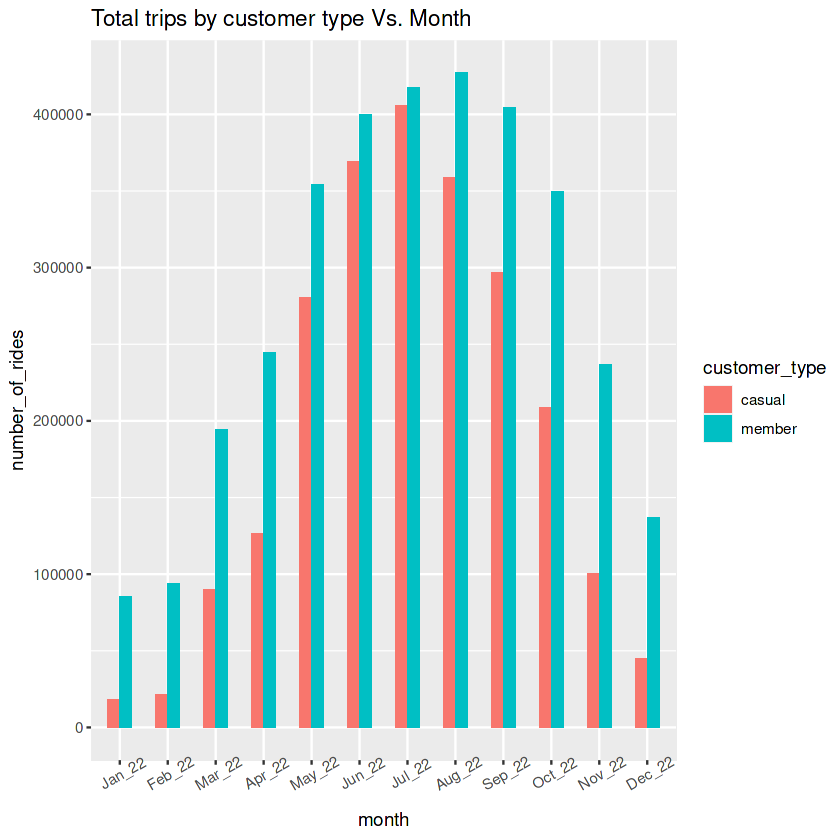

In [21]:
# Visualizing average number of trips by customer type and month.

all_trips_v2 %>%  
  group_by(customer_type, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(customer_type, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = customer_type)) +
  labs(title ="Total trips by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

According to the data, the months of June, July, August, and September are the busiest of the year for both regular riders and members. This may be attributable to an external source (such as cold weather or a serious quality problem) that interfered with meeting client demands. In contrast, throughout the course of the whole year, members always make more trips than casual riders.

**Visualization of average trip duration by customer type on each day of the week:**

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


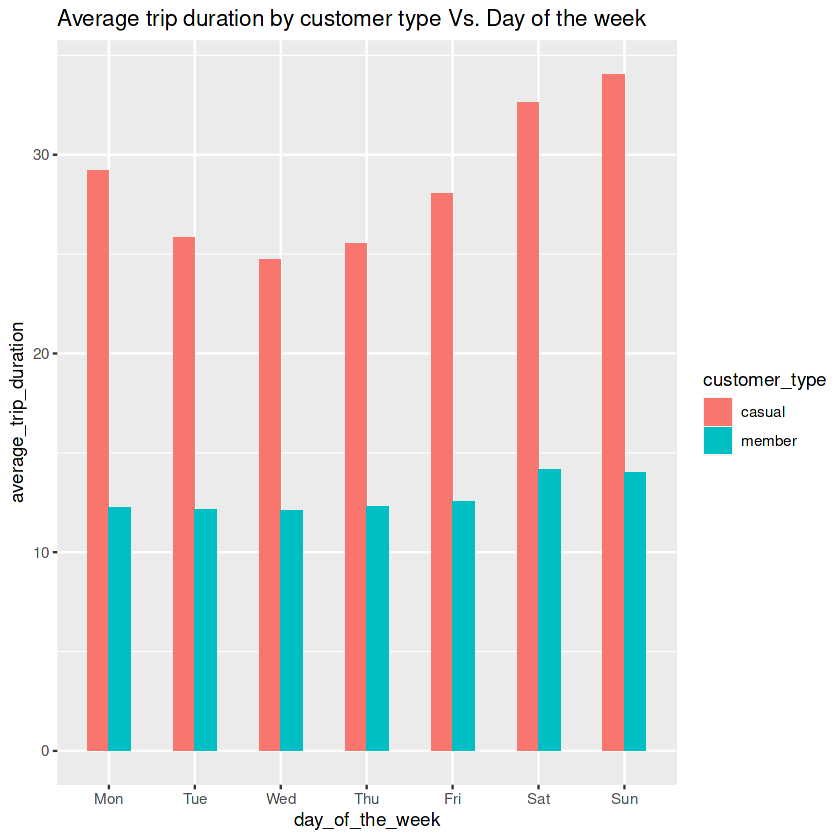

In [22]:
# Visualizing average trip duration by customer type on each day of the week.

all_trips_v2 %>%  
  group_by(customer_type, day_of_the_week) %>% 
  summarise(average_trip_duration = mean(trip_duration)) %>%
  ggplot(aes(x = day_of_the_week, y = average_trip_duration, fill = customer_type)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Day of the week")

A casual rider takes longer on average than a member to complete a journey. Take note that this does not imply that casual cyclists necessarily cover more distances. It's also noteworthy that, in comparison to weekdays, weekends seem to be associated with both longer and more frequent journeys.

**Visualization of average trip duration by customer type Vs. month:**

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


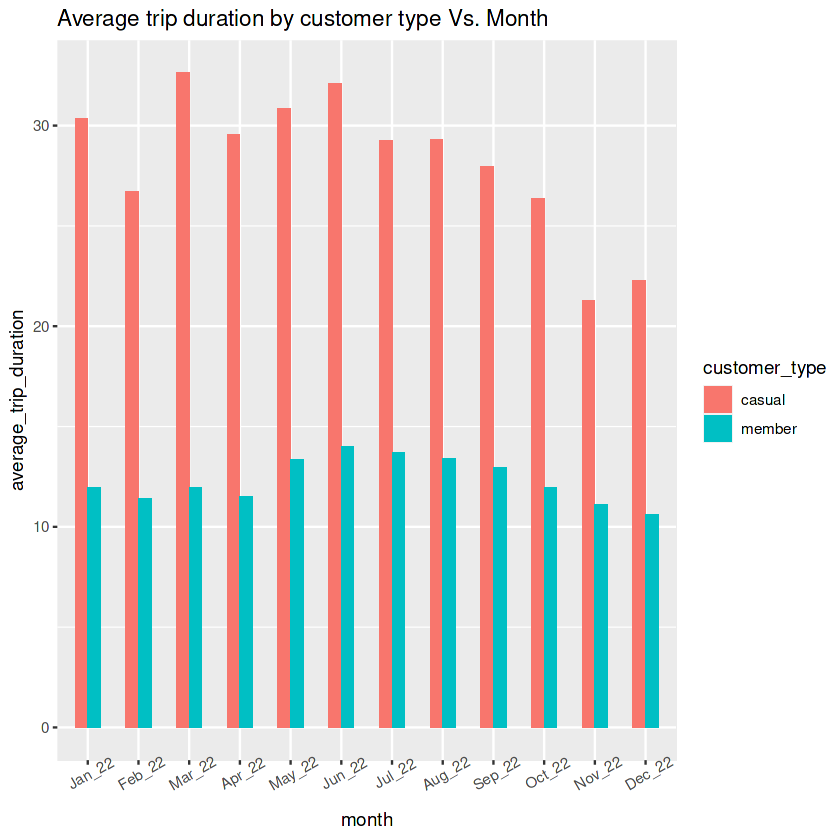

In [23]:
# Visualizing average trip duration by customer type Vs. month.

all_trips_v2 %>%  
  group_by(customer_type, month) %>% 
  summarise(average_trip_duration = mean(trip_duration)) %>%
  ggplot(aes(x = month, y = average_trip_duration, fill = customer_type)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30))

All other months of the year, except for March, when it slightly exceeds 30 minutes, member riders' average travel times range from 10 to 15 minutes. It is noteworthy that casual riders took especially lengthy trips in the months of January, March, May, and June.

**Visualization of bike demand over 24 hr period (a day):**

`summarise()` has grouped output by 'customer_type'. You can override using the
`.groups` argument.


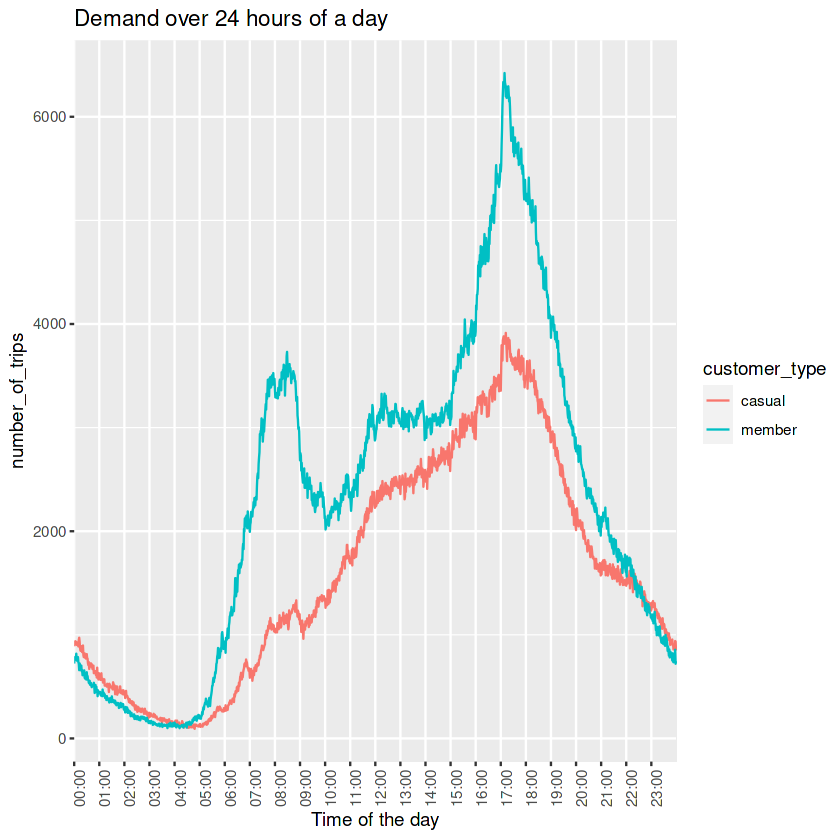

In [24]:
# Visualizing bike demand over 24 hr period (a day).

all_trips_v2 %>%  
  group_by(customer_type, time) %>% 
  summarise(number_of_trips = n()) %>%
  ggplot(aes(x = time, y = number_of_trips, color = customer_type, group = customer_type)) +
  geom_line() +
  scale_x_datetime(date_breaks = "1 hour", minor_breaks = NULL,
                   date_labels = "%H:%M", expand = c(0,0)) +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title ="Demand over 24 hours of a day", x = "Time of the day")

There appear to be two distinct high demand periods for members: 7-9 AM and 5-7 PM, the latter of which also happens to be when casual riders are most in demand. Given the demand in the morning and evening, it is probably safe to assume that office workers make up the bulk of the member profile. However, further information is required to support this hypothesis.

**Visualization of ride type Vs. number of trips by customer type:**

`summarise()` has grouped output by 'ride_type'. You can override using the
`.groups` argument.


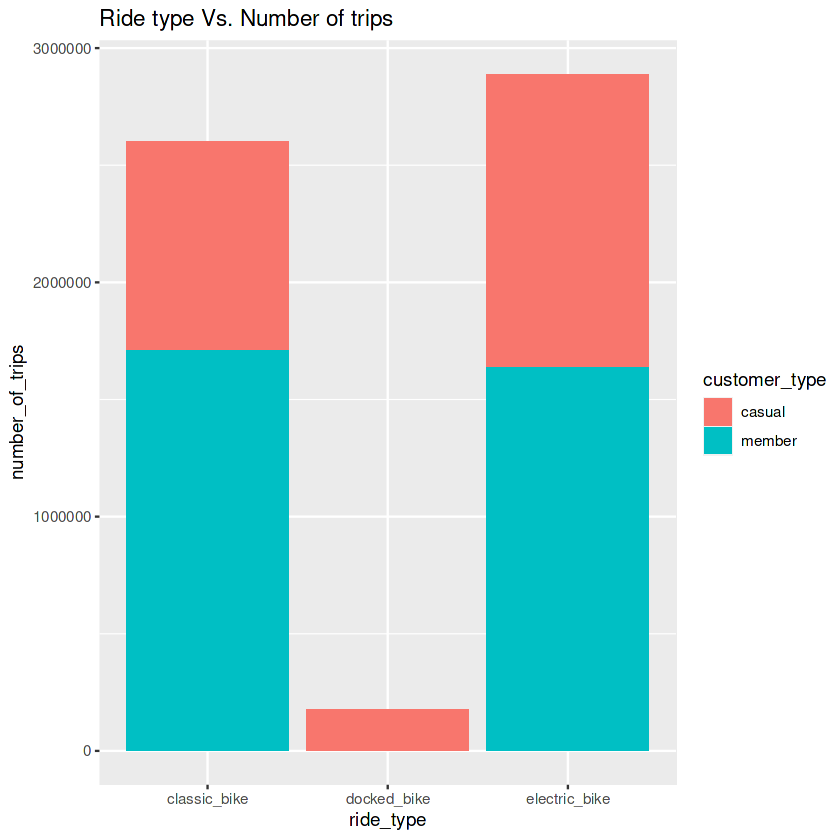

In [25]:
# Visualizing ride type Vs. number of trips by customer type.

all_trips_v2 %>%
  group_by(ride_type, customer_type) %>%
  summarise(number_of_trips = n()) %>%  
  ggplot(aes(x= ride_type, y=number_of_trips, fill= customer_type))+
  geom_bar(stat='identity') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  labs(title ="Ride type Vs. Number of trips")

Members and Casuals primarily ride classic bicycles and electric bicycles. Bikes that can be docked are less popular and are only used sometimes by riders. Members prefer electric bicycles more. If the cost of electric bikes is higher than the other two, expanding their fleet while lowering the number of parked bikes would be a wise economical decision.

Note: Information on the fleet size for each type of bike is not available.

**Creating a csv file of the clean data for futher analysis or visualizations in other tools like SQL, Tableau, Power BI, etc.:**

In [ ]:
# Creating a csv file of the clean data for further analysis or visualizations in other tools like SQL, Tableau, Power BI, etc.

clean_data <- aggregate(all_trips_v2$trip_duration ~ all_trips_v2$customer_type + all_trips_v2$day_of_the_week, FUN = mean)
write.csv(clean_data, "Clean Data.csv", row.names = F)

## 6. Act

**Key Takeaways**

* Member riders made total trips contributing to > 70% of total trip duration between Jan'22 - Dec'22. Casual riders made trips contributing to < 30% of total trip duration between Jan'22 - Dec'22. Riders who are members use bikes roughly two times as often as non-members (depending on trip length).
* Customers who use bikeshare systems regularly during the week tend to be members. Casual users tend to utilise them more frequently on the weekends.
* Over the course of a week, the average journey length of members is more than twice as long as that of casual users.
* While members log very equal average trip durations month over month, casual riders ride more during the first part of the year than they do during the second.
* While both classic bikes and electric bikes are favoured by member riders, casual riders like electric bikes more than anything else, followed by classic bikes and docked bikes for a small percentage of them.


**Recommendations**

* To encourage casual members to utilise the bikeshare services more consistently throughout the whole week, provide appealing promos for casual riders on weekdays.
* For renewals after the first year, provide a lower membership charge. It could encourage infrequent riders to sign up for membership.
* Offer lower prices during off-peak periods to encourage casual riders to use bikes more frequently and even out demand throughout the day.


**Additional data that could expand scope of analysis**

* A non-member who has a comparable occupation with a member rider might be targeted using the information about the rider's occupation.
* Age and gender profile - Again, this information might be utilised to research the group of riders that can be targeted for luring new members.
* Pricing information for both members and non-members - Using this information, we may be able to lower prices for non-members without harming our profit margin.
* In order to determine whether there are any location-specific criteria that promote participation, we need the members' addresses and neighborhoods.

**Resources**

* [Cyclistic bike share data](https://divvy-tripdata.s3.amazonaws.com/index.html).
* [RStudio](https://posit.co/download/rstudio-desktop/) and R community.
* [Kaggle](https://www.kaggle.com/) and Kaggle community.
* [StackOverflow](https://stackoverflow.com/).





## Acknowledgement

Finally, I would want to express my gratitude to the Google Data Analytics coursera team for their careful preparation, timely delivery of such a fantastic course, and chance to participate in the project. I appreciate the R community's excellent documentation across forums, which enabled me to select the tools and functions that were most helpful during the phases of preparation, processing, and analysis.